<font color="red">自分で書いたコードを保存するため、「ドライブにコピー」を押してください</font>

#### <font color="red">予習 問1</font>

フィボナッチ数列 $F_n$ の連続する 2 項の比は黄金比 $\varphi$ に収束することが知られています。この収束の様子を図に示してください。

$$
\frac{F_{n + 1}}{F_n} \rightarrow \varphi = 1.6180339887\dots,\quad n \rightarrow \infty
$$

**Hint :** [matplotlib のドキュメント](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.plot.html) を読んでみましょう。

<a href="https://raw.githubusercontent.com/a-lab-nagoya/PythonTutorials/main/asset/fibonacci.png"><img style="display: block; width: 40em; margin-left: auto; margin-right: auto;" alt="convergence to golden ratio" src="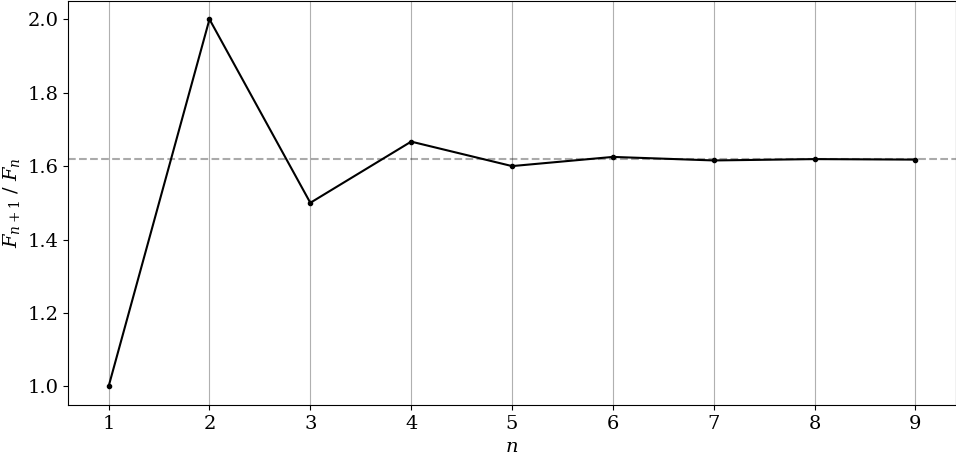
" /></a>

#### フィボナッチ数を求める

In [7]:
from math import floor, sqrt


def fib(n):
    return floor(((1 + sqrt(5)) / 2) ** n / sqrt(5) + 1 / 2)

fibonacci_numbers = [fib(n) for n in range(1, 11)]

#### フィボナッチ数の比を求める

In [8]:
ratio = [fn1 / fn for fn1, fn in zip(fibonacci_numbers[1:], fibonacci_numbers[:-1])]

#### グラフにする

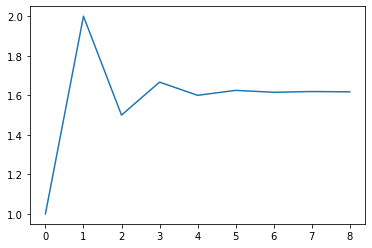

In [9]:
import matplotlib.pyplot as plt


# 図を作る
fig, ax = plt.subplots()

# データをプロットする
ax.plot(ratio)

---

#### 見本を再現する

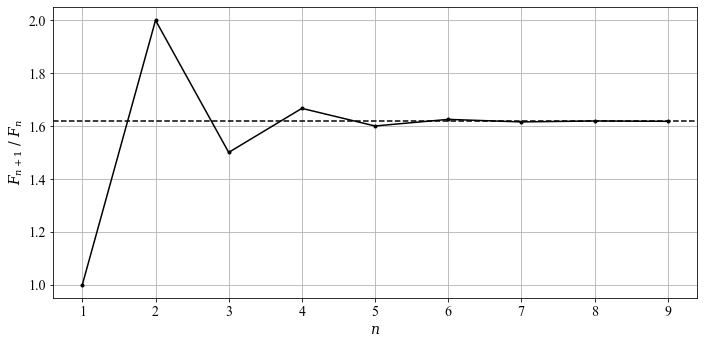

In [12]:
from math import floor, sqrt
import matplotlib.pyplot as plt

# プロットのフォントを変更
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"].insert(0, "Times New Roman")
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams["font.size"] = 14

def fib(n: int) -> int:
    return floor(((1 + sqrt(5)) / 2) ** n / sqrt(5) + 1 / 2)

n = range(1, 11)  # -> 1, 2, ..., 10
fibonacci_numbers = [fib(_n) for _n in n]
ratio = [fn1 / fn for fn1, fn in zip(fibonacci_numbers[1:], fibonacci_numbers[:-1])]

fig, ax = plt.subplots(figsize=[10, 5])
ax.plot(n[:-1], ratio, ".-", c="k")

# 収束する値に線を引く
ax.axhline((1 + 5 ** 0.5) / 2, c="k", ls="--")

# グリッド、軸ラベルの設定
ax.grid(True)
ax.set(xlabel=r"$n$", ylabel=r"$F_{n+1}\ /\ F_n$")
# 数式にはTeX記法が使える。ただし \tau は \t (タブ) au と認識されてしまう。
# このようなエスケープ文字を無視し、TeX記法を正確に認識させるには raw文字列 を使えば良い。(https://docs.python.org/ja/3.10/reference/lexical_analysis.html#literals)

fig.tight_layout()

#### <font color="red">問1</font>

実際に電波望遠鏡で得られたデータを可視化してみましょう。

**Hint :**
- [spectral-cube (Creating/reading spectral cubes)](https://spectral-cube.readthedocs.io/en/latest/creating_reading.html) でデータを読み込む
- [spectral-cube (Moment maps and statistics)](https://spectral-cube.readthedocs.io/en/latest/moments.html) 0次モーメントを計算することで2次元データにする
- 以下のいずれかのツールでプロットする
    - [APLpy (Beginner Tutorial)](https://aplpy.readthedocs.io/en/stable/fitsfigure/quickstart.html)  
    - [Astropy (Making plots with world coordinates)](https://docs.astropy.org/en/stable/visualization/wcsaxes/index.html)  
    - [Matplotlib](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.imshow.html)

<a href="https://raw.githubusercontent.com/a-lab-nagoya/PythonTutorials/main/asset/sample_fits_image.png"><img style="display: block; width: 40em; margin-left: auto; margin-right: auto;" alt="sample integrated intensity image" src="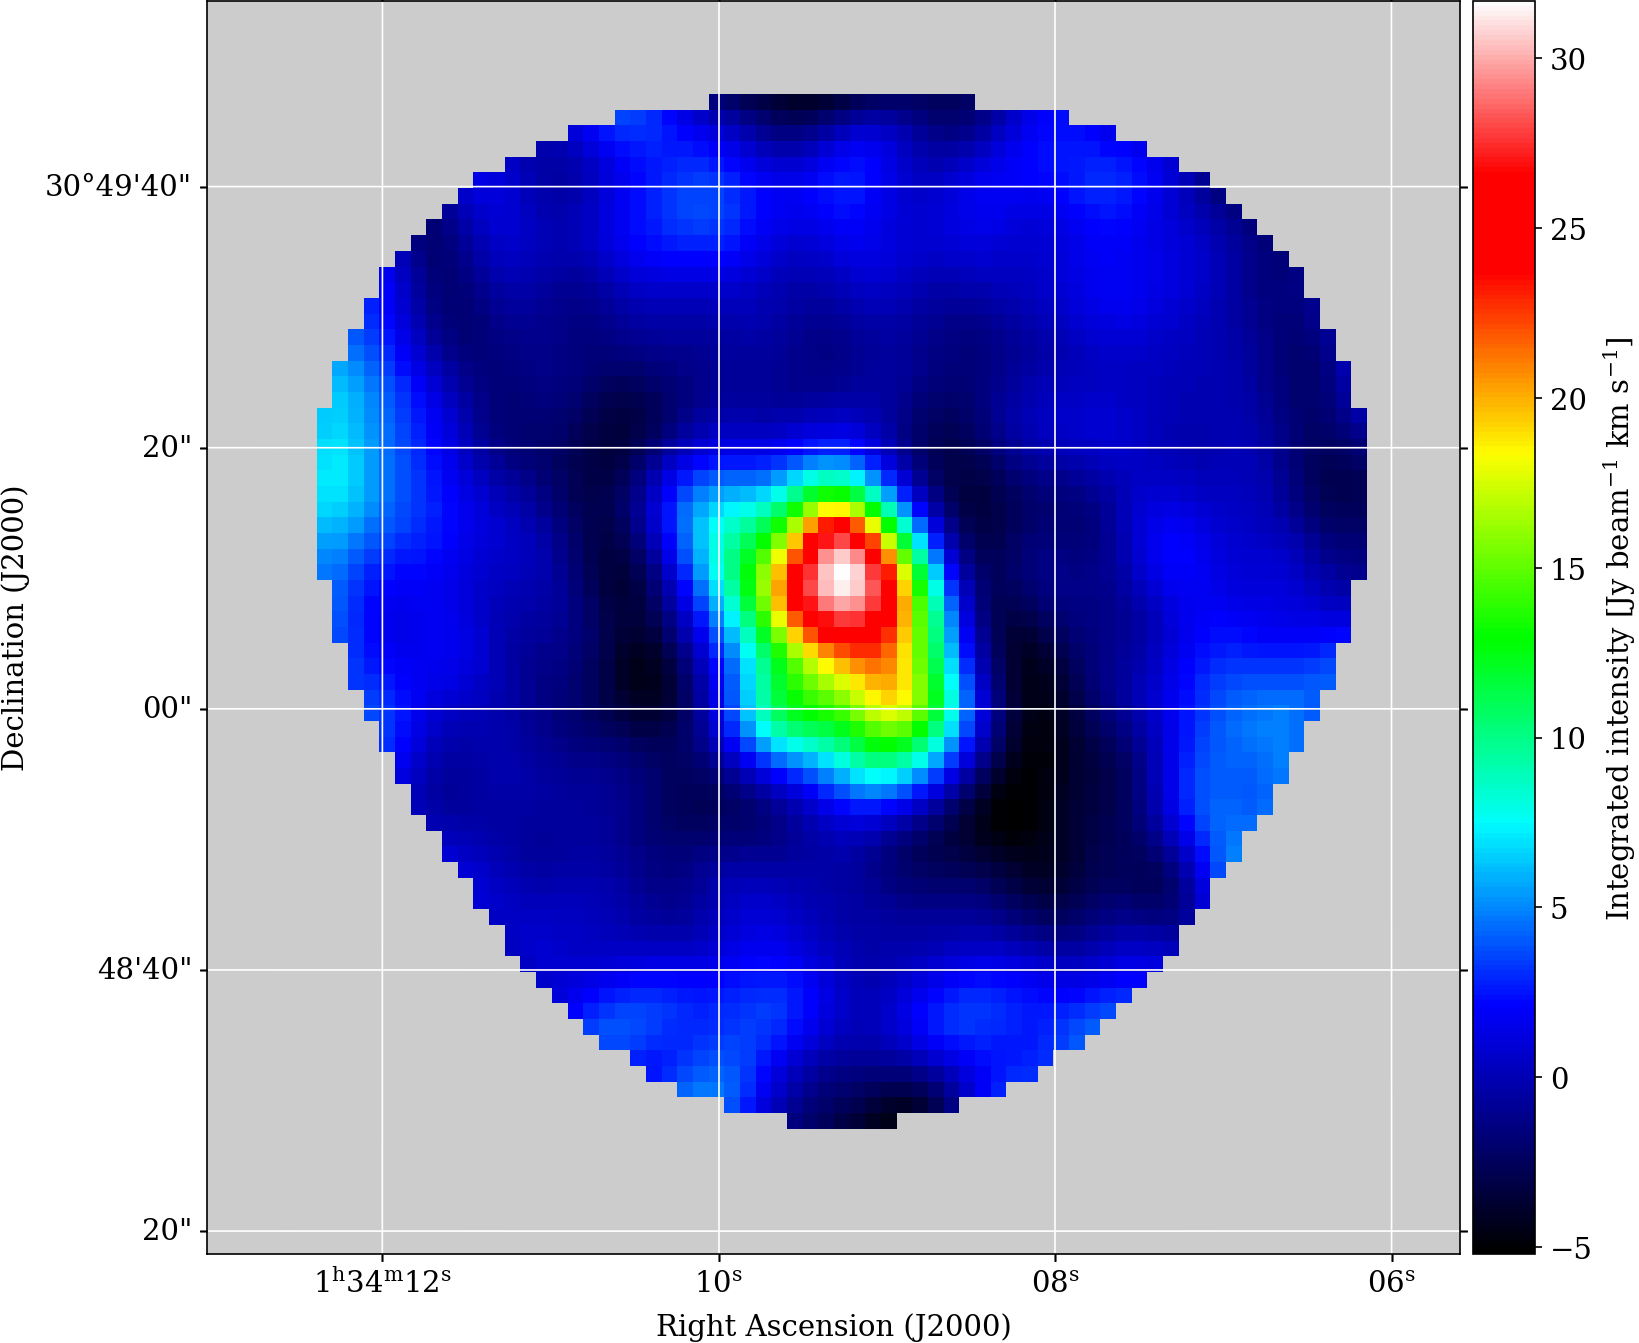
" /></a>

In [1]:
# データのダウンロード ("./GMC-8.spw16.12CO.7m.cube.pbcor.fits" として保存される)
!curl -sSLO https://raw.githubusercontent.com/a-lab-nagoya/xarray-cube/main/data/GMC-8.spw16.12CO.7m.cube.pbcor.fits

#### データの読み込み〜0次モーメントの計算

In [7]:
!pip install -q spectral-cube

from spectral_cube import SpectralCube
cube = SpectralCube.read("./GMC-8.spw16.12CO.7m.cube.pbcor.fits")

moment_0 = cube.moment(order=0)
moment_0.shape

(80, 80)

#### APLpy でプロット

     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 1.1 MB 12.2 MB/s 
     |████████████████████████████████| 1.3 MB 45.2 MB/s 
     |████████████████████████████████| 378 kB 58.3 MB/s 
     |████████████████████████████████| 208 kB 54.2 MB/s 
INFO: Auto-setting vmin to -8.336e+03 [aplpy.core]
INFO: Auto-setting vmax to  3.320e+04 [aplpy.core]


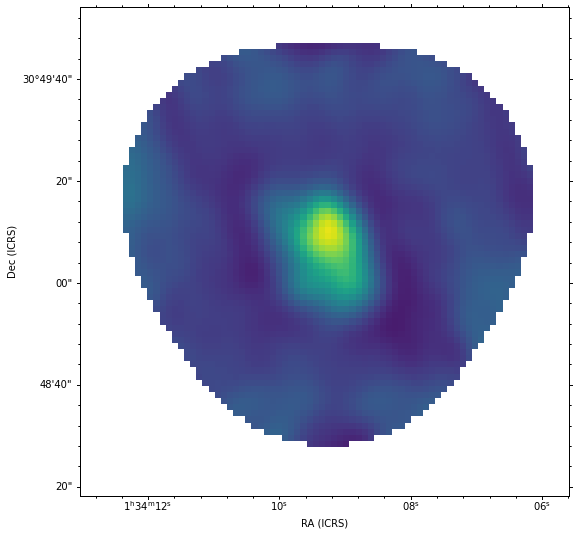

In [10]:
!pip install -q APLpy

import aplpy

# https://aplpy.readthedocs.io/en/stable/api/aplpy.FITSFigure.html#aplpy.FITSFigure より FITSFigure は HDU を受け取る
f = aplpy.FITSFigure(moment_0.hdu)
f.show_colorscale()

#### Astropy WCS Axes でプロット

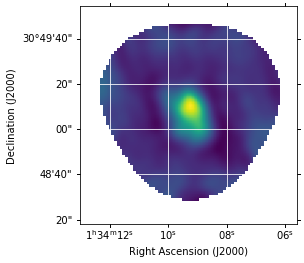

In [15]:
import matplotlib.pyplot as plt

hdu = moment_0.hdu
wcs = moment_0.wcs

plt.subplot(projection=wcs)
plt.imshow(hdu.data, origin='lower')
plt.grid(color='white', ls='solid')
plt.xlabel('Right Ascension (J2000)')
plt.ylabel('Declination (J2000)')

#### Matplotlib でプロット

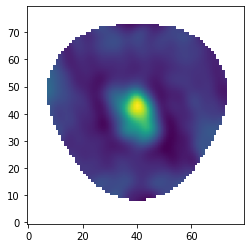

In [14]:
import matplotlib.pyplot as plt

plt.imshow(moment_0.value, origin="lower")

---

#### 見本を再現する

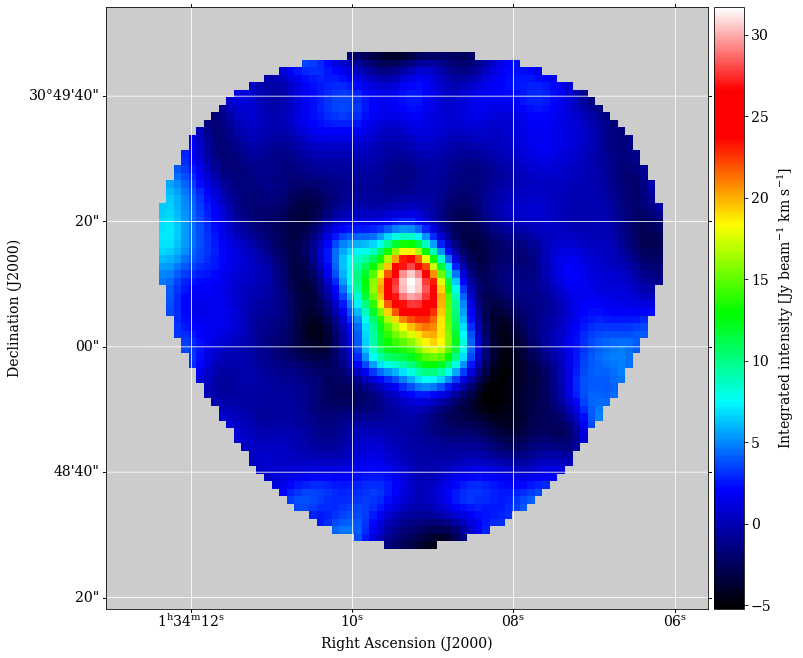

In [24]:
!pip install -q spectral-cube custom-colormaps

import matplotlib.pyplot as plt
from custom_colormaps.main import main
from matplotlib.axes import Axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from spectral_cube import SpectralCube

# プロットのフォントを変更
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"].insert(0, "Times New Roman")
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams["font.size"] = 14

# カラーマップ
cmap = main()
cmap.set_bad("#CCC")

# データの読み込み、0次モーメントの計算
cube = SpectralCube.read("GMC-8.spw16.12CO.7m.cube.pbcor.fits")
mom0 = cube.moment(0)

# プロットに使うデータを取り出す
data = mom0.hdu.data / 1000  # 速度の単位がデフォルトで m/s (cube.wcs.world_axis_units で確認できる) なので km/s に変換
wcs = mom0.wcs

# 図を作る
fig, ax = plt.subplots(figsize=[10, 10], subplot_kw=dict(projection=wcs))

# データを描画する
im = ax.imshow(data, origin="lower", cmap=cmap)

# グリッド、軸ラベルの設定
ax.grid(True, color="w")
ax.set(xlabel="Right Ascension (J2000)", ylabel="Declination (J2000)")

# カラーバーをつける
divider = make_axes_locatable(ax)  # 図と同じ高さのカラーバーを作る (https://matplotlib.org/stable/gallery/axes_grid1/demo_colorbar_with_axes_divider.html)
cax = divider.append_axes(position="right", size="5%", pad="1%", axes_class=Axes)  # WCSのバグを回避するため axes_class=Axes を指定 (https://stackoverflow.com/questions/47060939/matplotlib-colorbar-and-wcs-projection)
fig.colorbar(
    im, cax=cax, label=r"Integrated intensity $\mathrm{[Jy\ beam^{-1}\ km\ s^{-1}]}$"
)

fig.tight_layout()
fig.savefig("sample_image.png", dpi=150, bbox_inches="tight", pad_inches=0.01)